### Guided Practice: Logit Function and Odds

In [3]:
import numpy as np


In [6]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    
    #ny.log(p)/ny.log(1-p)
    #odds = ln(p / (1-p) )
    
    return np.log(odds)

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    #logit = 1 / (1 + e-f)
    return 1. / (1 + np.exp(-logit))

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

In [7]:
for odds in odds_set:
    log_odds = logit_func(odds)
    print sigmoid_func(log_odds)

0.833333333333
0.952380952381
0.52380952381
0.642857142857
0.615384615385


In [25]:
!pip install sklearn

In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [39]:
lm = LogisticRegression()

df = pd.read_csv('../../assets/dataset/collegeadmissions.csv')

df2 = df

In [40]:
df2 = df2.join(pd.get_dummies(df2['rank']))

In [41]:

columns2 = df2.columns.tolist()
print columns


#print columns[0:3] + columns[4:7]

columnsToKeep2 = columns2[0:3] + columns2[4:7]
print columnsToKeep2

['admit', 'gre', 'gpa', 'rank']
['admit', 'gre', 'gpa', 1, 2, 3]


In [43]:

X = df2[columnsToKeep2]
y = df2.admit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [44]:
type(X_train)

pandas.core.frame.DataFrame

In [57]:
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [12]:
df = df.join(pd.get_dummies(df['rank']))

In [18]:
columns = df.columns.tolist()
print columns


#print columns[0:3] + columns[4:7]

columnsToKeep = columns[0:3] + columns[4:7]
print columnsToKeep
df.head()


['admit', 'gre', 'gpa', 'rank', 1, 2, 3, 4]
['admit', 'gre', 'gpa', 1, 2, 3]


,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [20]:
#lm.fit(df[['gre', 'gpa', 1, 2, 3,]], df['admit'])


lm.fit(df[columnsToKeep], df['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
import numpy as np

In [22]:
print lm.coef_
print lm.intercept_
print df.admit.mean()

[[  6.54994116e+00  -8.01000180e-04  -6.85089707e-01   3.33983238e-01
    5.38477795e-03  -1.96267254e-01]]
[-0.79735787]
0.3175


Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

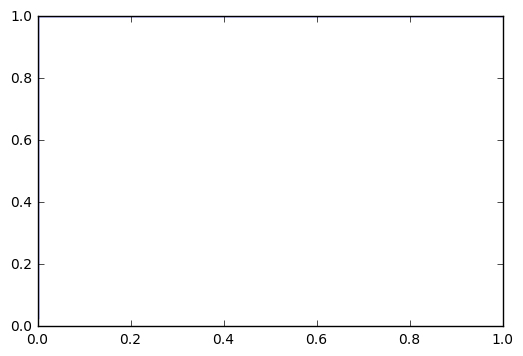

In [59]:
actuals = lm.predict(X_test) 
probas = lm.predict_proba(X_test)

#print actuals 
#print probas
#print probas[:,1]
fpr = roc_curve(y_test, probas[:,1])[0]
tpr = roc_curve(y_test, probas[:,1])[1]


plt.plot(fpr, tpr)

In [60]:
y_test['predicted_prob'] = probas
y_test.head()

209    0
280    0
33     1
210    0
93     0
Name: admit, dtype: object

In [61]:
y_test

209                                                               0
280                                                               0
33                                                                1
210                                                               0
93                                                                0
84                                                                1
329                                                               0
94                                                                1
266                                                               0
126                                                               1
9                                                                 0
361                                                               1
56                                                                0
72                                                                0
132                                             

In [64]:
predictionDf = pd.DataFrame({"actual": y_test, "predicted": np.array(probas[:,1])})
predictionDf

for threshold in [0.10, 0.20, 0.30,0.40]:
    columnName = "predicted_class_{}".format(threshold)
    predictionDf[columnName] = predictionDf.predicted.apply(
        lambda prob: 1 if prob > threshold else 0
    )
    print pd.crosstab(predictionDf.actual,predictionDf[columnName])
    
    
    #or
threshold = 0   
while threshold <= 1:
    columnName = "predicted_class_{}".format(threshold)
    predictionDf[columnName] = predictionDf.predicted.apply(
        lambda prob: 1 if prob > threshold else 0
    )
    print pd.crosstab(predictionDf.actual,predictionDf[columnName])    

ValueError: array length 120 does not match index length 121

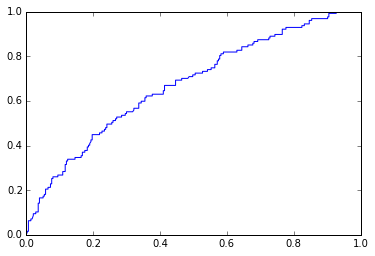

In [75]:
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

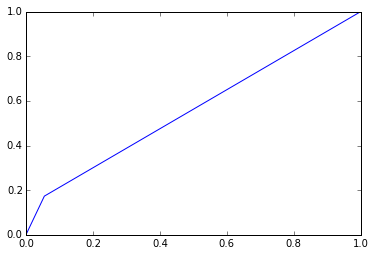

In [71]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [72]:
roc_auc_score(df['admit'], lm.predict(feature_set)

0.55914164575581893

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).